# Image Denoising
   **A. Read the image of Camerman image at the input and apply Gaussian noises, salt pepper to it. Then apply the mean, median and Gaussian filters to the corrupted images. The size of the filters should be considered in 3x3 and 5x5 sizes. Repeat the required process for the Baboon image. What difference do you see in applying different filters in these two images? Explain the differences in the form of a report.**
   
   **B. Before applying the filters required in the previous section, map the image using a logarithmic function and then filter. After applying the spatial filter using the logarithmic function, reconstruct the image and examine the effect of applying the logarithmic function in reducing noise.**

The following code snippet import required third-party libraries:
+ `cv2` for reading and utilizing image processing functions
+ `numpy` for calculating and considering images as numerical matrixes
+ `matplotlib.pyplot` for showing images in the output
+ `skimage` for changing and applyting filters to images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage

### Part A
In the following code snippet, we are going to read two benchmark images.

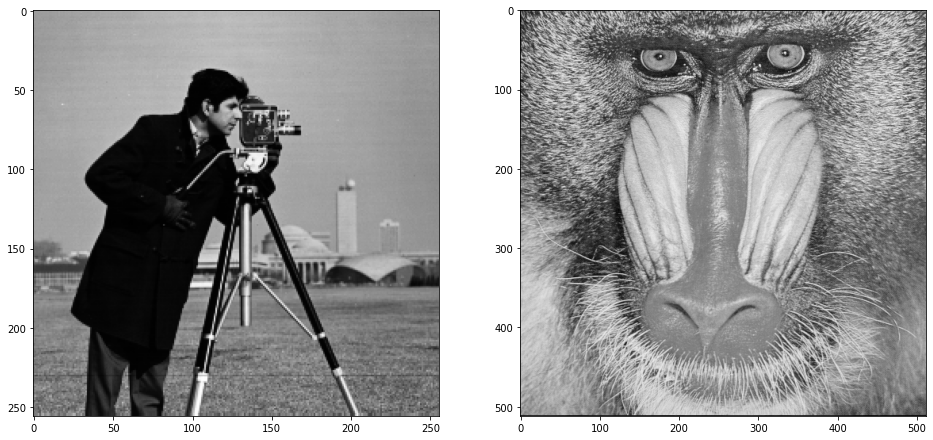

In [2]:
# Reading images in grayscale mode
cameraman = cv2.imread("../../images/cameraman.tif", cv2.IMREAD_GRAYSCALE)
baboon = cv2.imread("../../images/mandril.tiff", cv2.IMREAD_GRAYSCALE)

# Showing the image in subplots
f, subplt = plt.subplots(1, 2, figsize=(16, 14))
subplt[0].imshow(cameraman, cmap="gray")
subplt[1].imshow(baboon, cmap="gray")
plt.show()

As we can see, Cameraman is a image with low frequency of changes, textures are smooth. On the other hand, Baboon image has high frequency of changes.

In the next few lines, we import some useful functions from `skimage` library.

In [3]:
from skimage.util import random_noise
from skimage.morphology import disk
from skimage.filters import median
from skimage.filters import gaussian

In the next cell, we define a functions which gets a image and generate 7 different versions of it:
1. Corrupted Image: the image with gaussian and salt & pepper noises
2. Mean filter 3x3: Apply mean filter with size 3x3 to the image
3. Mean filter 5x5: Apply mean filter with size 5x5 to the image
4. Median filter 3x3: Apply median filter with size 3x3 to the image
5. Median filter 5x5: Apply median filter with size 5x5 to the image
6. Gaussian filter 3x3: Apply Gaussian filter with size 3x3 to the image
7. Gaussian filter 5x5: Apply Gaussian filter with size 5x5 to the image

Finally it will show all of them in the output.

In [4]:
def noise_test(image):
    """
    image: desire image to add noise and apply mean, median and Gaussian filter to it.
    return None; It will show org image, corrupted image, and results of 6 filters.
    """

    # Adding Gaussian noise
    corrrupted_image = random_noise(image, mode="gaussian", var=0.01, mean=0)
    # Adding salt and pepper noise
    corrrupted_image = random_noise(corrrupted_image, mode="s&p")

    # Applying 3x3 mean filter
    kernel = np.ones((3, 3), dtype=np.float32) / 49
    mean_3 = cv2.filter2D(corrrupted_image, -1, kernel)
    # Applying 5x5 mean filter
    kernel = np.ones((5, 5), dtype=np.float32) / 25
    mean_5 = cv2.filter2D(corrrupted_image, -1, kernel)

    # Applying 3x3 median filter
    median_3 = median(corrrupted_image, disk(3))
    # Applying 5x5 median filter
    median_5 = median(corrrupted_image, disk(5))

    # Applying 3x3 Gaussian filter
    gaussian_3 = gaussian(corrrupted_image, sigma=3 / 6)
    # Applying 5x5 Gaussian filter
    gaussian_5 = gaussian(corrrupted_image, sigma=5 / 6)

    # Showing every result with title and without axis
    f, subplt = plt.subplots(4, 2, figsize=(16, 14))

    subplt[0][0].imshow(image, cmap="gray")
    subplt[0][0].set_title("Original Image")
    subplt[0][0].axis("off")

    subplt[0][1].imshow(corrrupted_image, cmap="gray")
    subplt[0][1].set_title("Corrupted Image")
    subplt[0][1].axis("off")

    subplt[1][0].imshow(mean_3, cmap="gray")
    subplt[1][0].set_title("Mean Filter 3x3")
    subplt[1][0].axis("off")

    subplt[1][1].imshow(mean_5, cmap="gray")
    subplt[1][1].set_title("Mean Filter 5x5")
    subplt[1][1].axis("off")

    subplt[2][0].imshow(median_3, cmap="gray")
    subplt[2][0].set_title("Medain Filter 3x3")
    subplt[2][0].axis("off")

    subplt[2][1].imshow(median_5, cmap="gray")
    subplt[2][1].set_title("Median Filter 5x5")
    subplt[2][1].axis("off")

    subplt[3][0].imshow(gaussian_3, cmap="gray")
    subplt[3][0].set_title("Gaussian Filter 3x3")
    subplt[3][0].axis("off")

    subplt[3][1].imshow(gaussian_5, cmap="gray")
    subplt[3][1].set_title("Gaussian Filter 5x5")
    subplt[3][1].axis("off")

    plt.show()


In next two code snippet, we call function above for the two images:

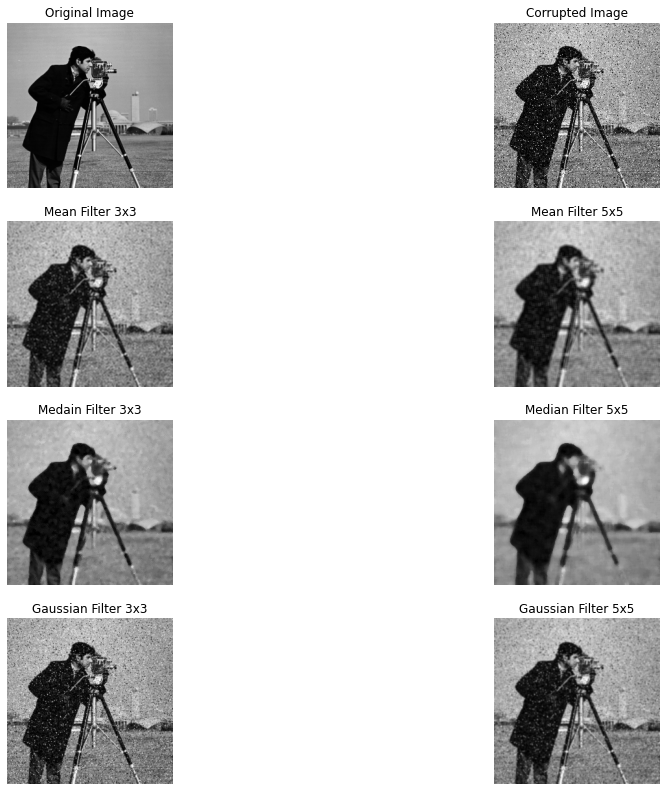

In [5]:
# Testing Camerman image
noise_test(cameraman)

As we can see mean the filters made picture roughly blurring. Median filters seem not very useful because they do not try to generate new values in order to reduce noises (If we had only salt and pepper noise, median filters would be probably the most useful filters). Gaussian filters tried to save edges and reduce noises on smooth fragments which seems suitable.

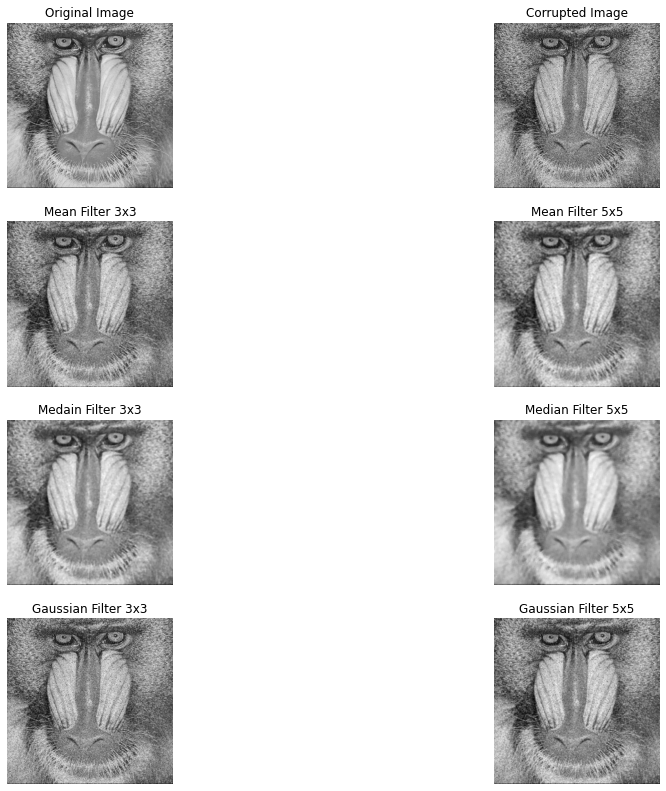

In [6]:
# Testing Baboon image
noise_test(baboon)

This picture has high frequency of changes, so it is hard to see differences between them. Median Filter 5x5 seems so blurring. But overall, all of the pictures looks nice.

### Part B 

In the next two code snippets, we will apply logarithmic correction on the images before we add noise and apply filters.
We will use `adjust_gamma()` from `skimage`. For alpha = 1 it will not change the image, for alpha < 1, it is a logarithmic function and for alpha > 1, it is an exponential function.
In the following cases, the alpha is 0.5 which means logarithmic correction.

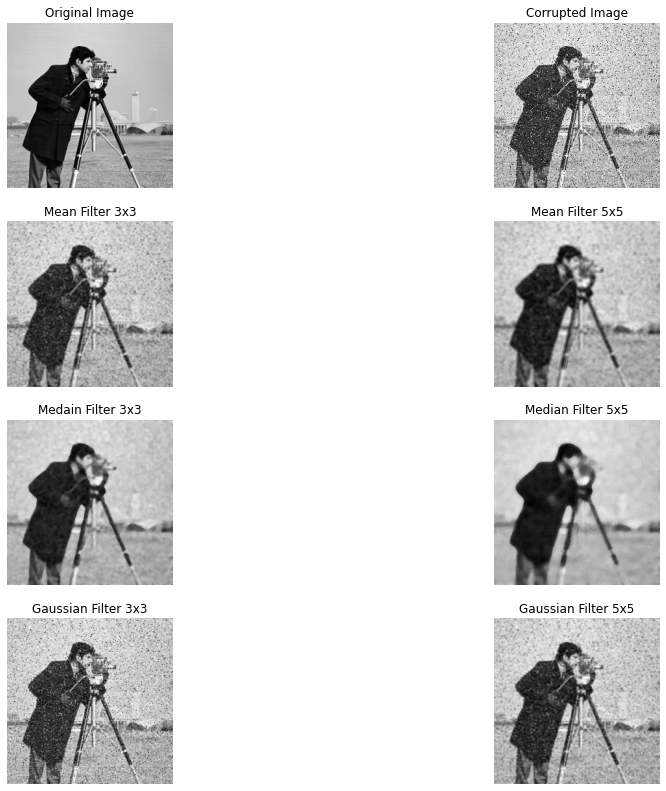

In [7]:
# Applying logarithmic corrction to the image and testing it
cameraman_log = skimage.exposure.adjust_gamma(cameraman, 0.5)
noise_test(cameraman_log)

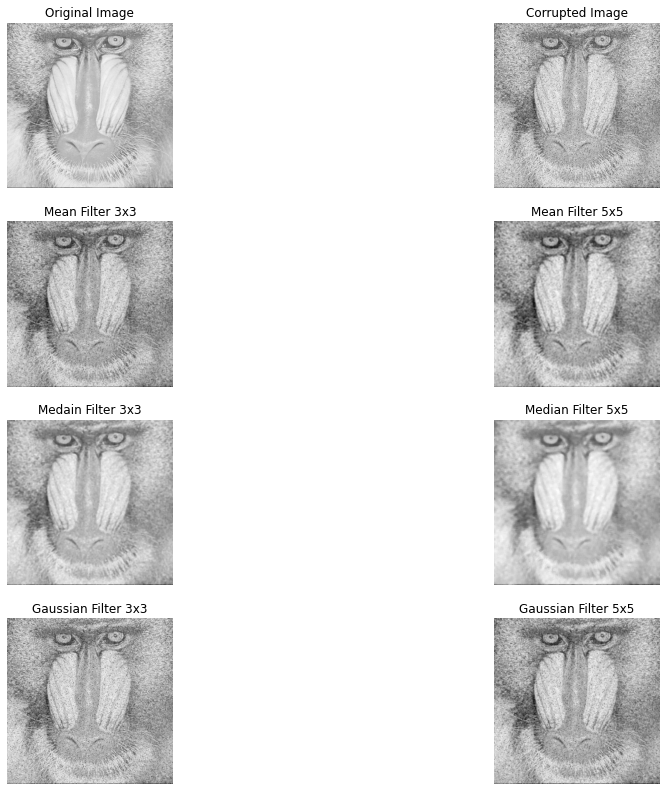

In [8]:
# Applying logarithmic change to the image and testing it
baboon_log = skimage.exposure.adjust_gamma(baboon, 0.5)
noise_test(baboon_log)

Logarithmic correction increases the value of low-valued pixels but leaves high-valued pixels roughly the same.
So a seeable change in the images above is their higher brightness, but overall the procedure of generating noise and applying filters did not change so much.

Cameraman pictures did not change significantly, but the baboon image has a lower frequency of changes after log, so filters are more significant.

float16
float32


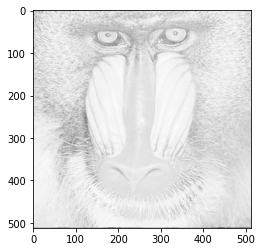

In [39]:
babon = cv2.imread('../../images/mandril.tiff', 0)
l = 20*np.log(babon+1)
print(l.dtype)
l = l.astype(np.float32, copy=False)
print(l.dtype)
plt.imshow(l, cmap= 'gray')